In [13]:
import numpy as np  # Vectors and matrices
import pandas as pd #Manipulation de données
import matplotlib.pyplot as plt  # Plots
# Enable nice plots
import matplotlib as mpl
try:
    mpl.style.use('seaborn-v0_8')
except:
    mpl.style.use('seaborn')
mpl.rcParams['image.cmap'] = 'plasma'
nice_hist = dict(bins='auto', density=True, ec='w')

import seaborn as sns # Alternative Plots
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler #For normalization 

In [15]:
df_csv = pd.read_csv('goodreads_books_f.csv')

# Renommer la colonne "Premier genre" en "Genres"
df_csv = df_csv.rename(columns={'Premier genre': 'Genres'})
df_csv = df_csv.rename(columns={'Ratings': 'Nombre de lecteurs'})


print(df_csv)

                                 Titre  Année de publication  Pages  \
0    The Invisible Life of Addie LaRue                  2020    448   
1        The House in the Cerulean Sea                  2020    394   
2                    Project Hail Mary                  2021    476   
3                 The Midnight Library                  2020    288   
4                 I'm Glad My Mom Died                  2022    320   
..                                 ...                   ...    ...   
495        Homicidal Psycho Jungle Cat                  1994    176   
496                  One for the Money                  1994    320   
497                          The Beach                  1996    436   
498              We Were the Mulvaneys                  1996    454   
499                         Underworld                  1997    827   

     Nombre de lecteurs  Note moyenne  \
0               1298512          4.18   
1                793548          4.39   
2                745166 

In [17]:
#Nouvelle sauvegarde 
df_csv.to_csv("goodreads_books_f.csv", index=False, encoding="utf-8")

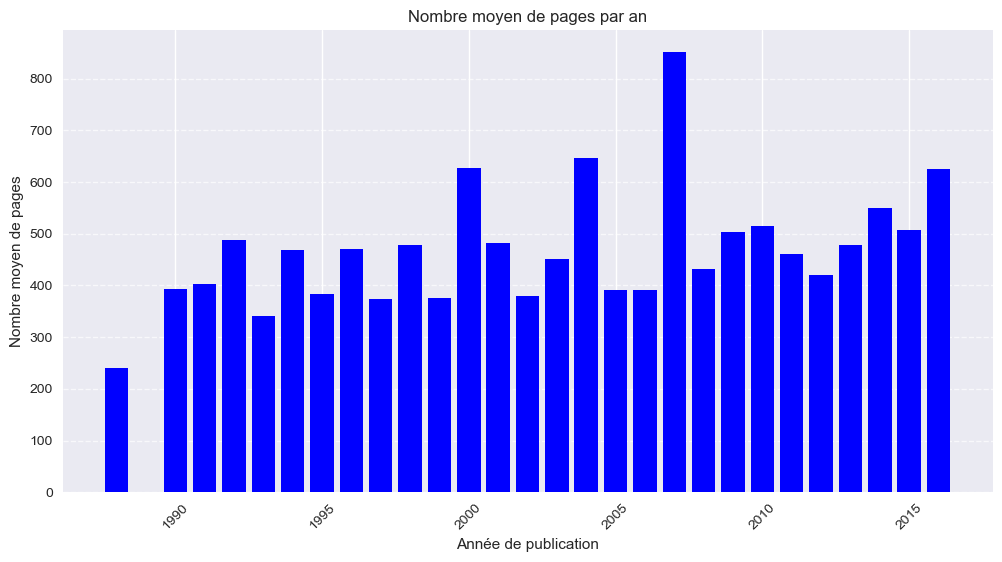

In [19]:
#Diagramme en bâtons pour le nombre moyen de pages par an

# Filtrer les données jusqu'à l'année 2016
df = df_csv[df_csv["Année de publication"] <= 2016]

# Calculer la moyenne du nombre de pages par année
pages_par_an = df.groupby("Année de publication")["Pages"].mean()

# Trier par année croissante
pages_par_an = pages_par_an.sort_index()

# Tracer le diagramme en bâtons
plt.figure(figsize=(12, 6))
plt.bar(pages_par_an.index, pages_par_an.values, color='blue')
plt.xlabel("Année de publication")
plt.ylabel("Nombre moyen de pages")
plt.title("Nombre moyen de pages par an")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

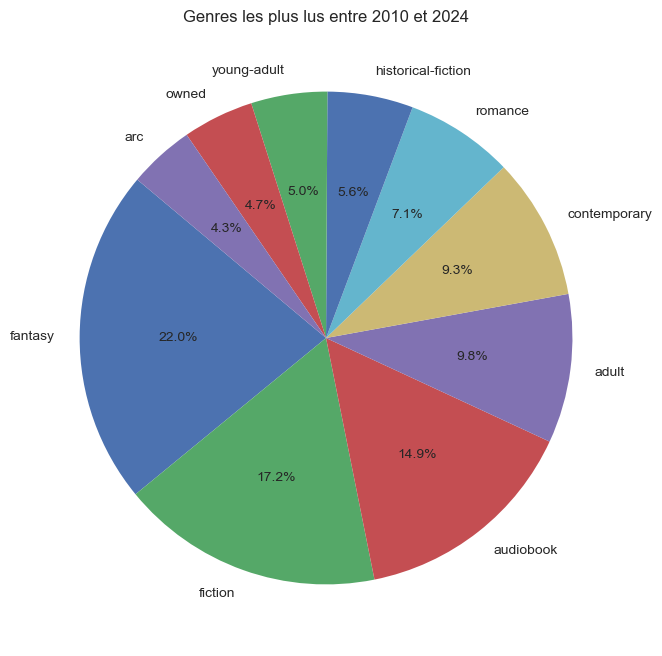

In [21]:
#Pie chart des genres les plus lus entre 2010 et 2024
from collections import Counter

# Filtrer les livres publiés entre 2010 et 2024
df = df_csv[(df_csv['Année de publication'] >= 2010) & (df_csv['Année de publication'] <= 2024)]

# Extraire les genres et les normaliser (tout en minuscules)
genres = []
for genre_list in df['Genres']:
    # Convertir la chaîne de caractères en liste
    genre_list = eval(genre_list)
    # Convertir chaque genre en minuscules pour éviter les doublons
    genres.extend([genre.lower() for genre in genre_list if genre.lower() != "2020" and genre.lower() != "favorites" and genre.lower() != "netgalley"])  # Exclure "2020" et "favorites"

# Compter les occurrences de chaque genre
genre_counts = Counter(genres)

# Convertir en DataFrame pour une manipulation plus facile
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])

# Trier par le nombre d'occurrences
genre_df = genre_df.sort_values(by='Count', ascending=False)

# Afficher les 10 genres les plus populaires
top_genres = genre_df.head(10)

# Créer la pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_genres['Count'], labels=top_genres['Genre'], autopct='%1.1f%%', startangle=140)
plt.title('Genres les plus lus entre 2010 et 2024')
plt.show()

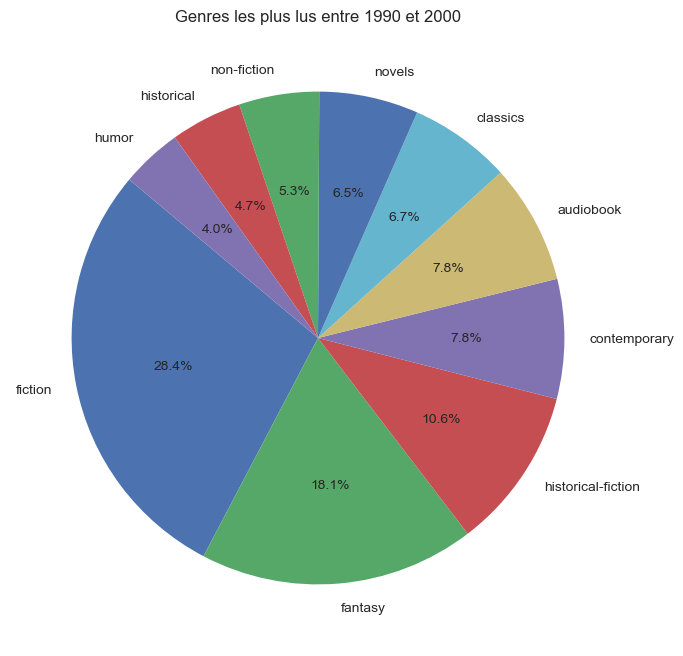

In [23]:
#Pie chart des genres les plus lus entre 1990 et 2000
from collections import Counter

# Filtrer les livres publiés entre 1990 et 2000
df = df_csv[(df_csv['Année de publication'] >= 1990) & (df_csv['Année de publication'] <= 2000)]

# Extraire les genres et les normaliser (tout en minuscules)
genres = []
for genre_list in df['Genres']:
    # Convertir la chaîne de caractères en liste
    genre_list = eval(genre_list)
    # Convertir chaque genre en minuscules pour éviter les doublons
    genres.extend([genre.lower() for genre in genre_list if genre.lower() != "favorites"])

# Compter les occurrences de chaque genre
genre_counts = Counter(genres)

# Convertir en DataFrame pour une manipulation plus facile
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])

# Trier par le nombre d'occurrences
genre_df = genre_df.sort_values(by='Count', ascending=False)

# Afficher les 10 genres les plus populaires
top_genres = genre_df.head(10)

# Créer la pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_genres['Count'], labels=top_genres['Genre'], autopct='%1.1f%%', startangle=140)
plt.title('Genres les plus lus entre 1990 et 2000')
plt.show()

In [35]:
import ast

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

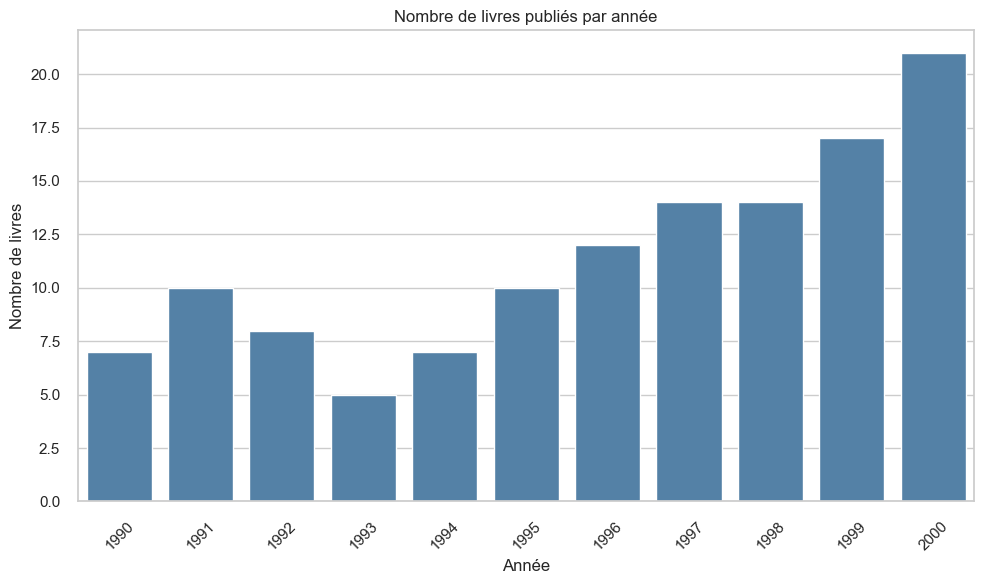

In [75]:
#Nombre de livres publiés par année
plt.figure()
sns.countplot(data=df, x='Année de publication', order=sorted(df['Année de publication'].unique()),color='steelblue')
plt.xticks(rotation=45)
plt.title("Nombre de livres publiés par année")
plt.xlabel("Année")
plt.ylabel("Nombre de livres")
plt.tight_layout()
plt.show()

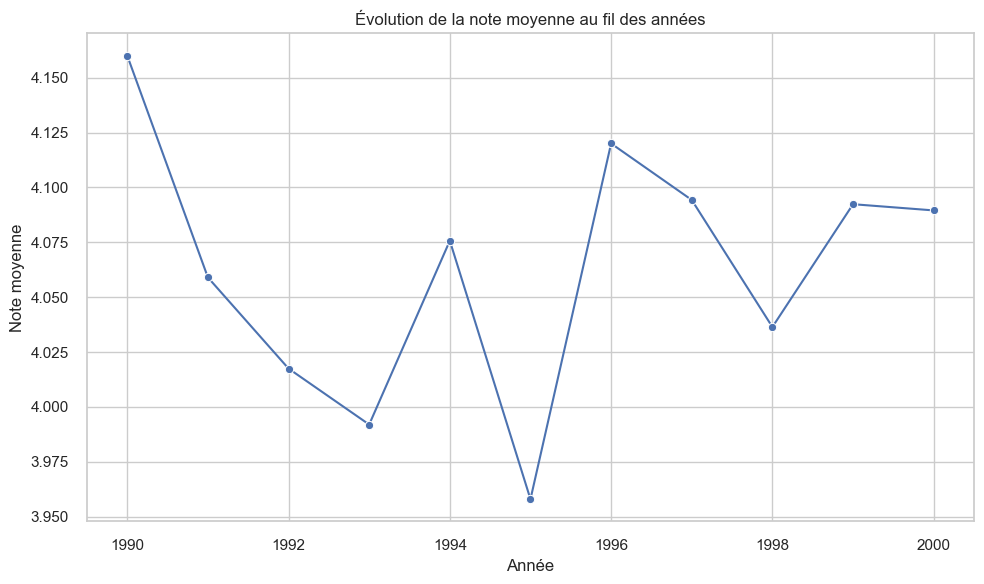

In [39]:
#Évolution de la note moyenne au fil des années
plt.figure()
df_grouped = df.groupby("Année de publication")["Note moyenne"].mean().reset_index()
sns.lineplot(data=df_grouped, x='Année de publication', y='Note moyenne', marker='o')
plt.title("Évolution de la note moyenne au fil des années")
plt.xlabel("Année")
plt.ylabel("Note moyenne")
plt.tight_layout()
plt.show()

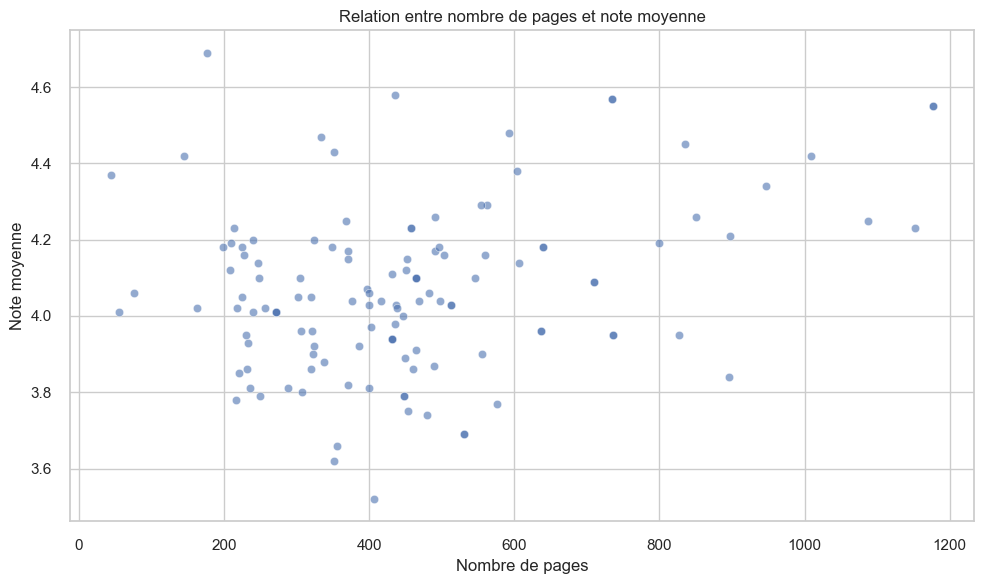

In [53]:
#Relation entre nombre de pages et note moyenne
plt.figure()
sns.scatterplot(data=df, x="Pages", y="Note moyenne", alpha=0.6)
plt.title("Relation entre nombre de pages et note moyenne")
plt.xlabel("Nombre de pages")
plt.ylabel("Note moyenne")
plt.tight_layout()
plt.show()

In [77]:
print(genre_df)

                         Genre  Count
1                      fiction    297
0                      fantasy    189
81          historical-fiction    111
70                contemporary     82
5                    audiobook     82
...                        ...    ...
1703                     lgbtq      1
1494  the-goodreads-experience      1
1942              cozy-mystery      1
1633       artistic-absorption      1
2004   verrisse-enttäuschungen      1

[2005 rows x 2 columns]


In [82]:
# Extraire les genres et les normaliser (tout en minuscules)
genres = []
for genre_list in df_csv['Genres']:
    # Convertir chaque genre en minuscules pour éviter les doublons
    genres.extend([genre.lower() for genre in genre_list if genre.lower() != "favorites"])

# Compter les occurrences de chaque genre
genre_counts = Counter(genres)

# Convertir en DataFrame pour une manipulation plus facile
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])

# Trier par le nombre d'occurrences
genre_df = genre_df.sort_values(by='Count', ascending=False)

# Afficher les 10 genres les plus populaires
top_genres = genre_df.head(10)
print(top_genres)

                  Genre  Count
1               fiction    969
0               fantasy    883
41            audiobook    501
209  historical-fiction    368
10         contemporary    344
4                 adult    253
2               romance    233
5            historical    189
28                owned    178
661         non-fiction    176


In [90]:
# Liste des genres les plus fréquents (en minuscules pour la correspondance)
top_genres = ['fiction', 'fantasy', 'audiobook', 'historical-fiction', 
              'contemporary', 'adult', 'romance', 'historical', 
              'owned', 'non-fiction']

# 1. Convertir les genres en minuscules et exploser le dataframe
exploded_df = df_csv.copy()
exploded_df['Genres'] = exploded_df['Genres'].apply(lambda x: [g.lower() for g in x])
exploded_df = exploded_df.explode('Genres')

# 2. Filtrer pour garder seulement les genres top et calculer la moyenne
result_df = exploded_df[exploded_df['Genres'].isin(top_genres)]\
    .groupby('Genres')['Note moyenne']\
    .agg(['mean', 'count'])\
    .rename(columns={'mean': 'Note moyenne', 'count': 'Nombre de livres'})\
    .sort_values('Note moyenne', ascending=False)

# 3. Afficher le résultat
print(result_df)

                    Note moyenne  Nombre de livres
Genres                                            
fantasy                 4.199751               883
historical              4.181270               189
owned                   4.176404               178
audiobook               4.157206               501
historical-fiction      4.140679               368
adult                   4.132609               253
non-fiction             4.079602               176
fiction                 4.064489               969
romance                 4.049442               233
contemporary            4.044535               344


Colonnes disponibles : ['Titre', 'Année de publication', 'Pages', 'Nombre de lecteurs', 'Note moyenne', 'Genres', 'Genres_list']


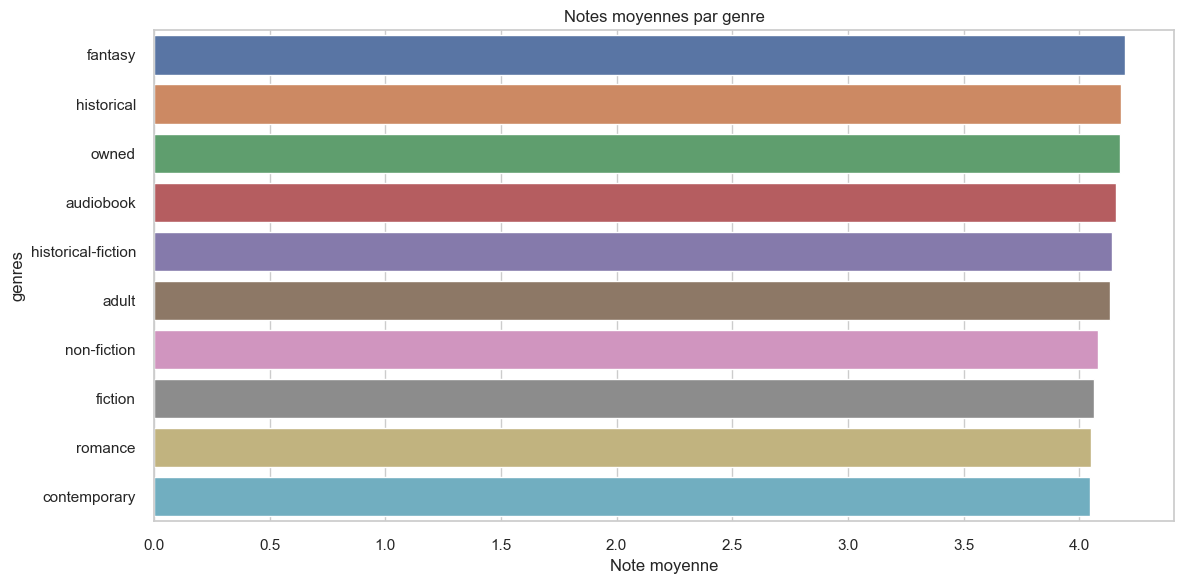

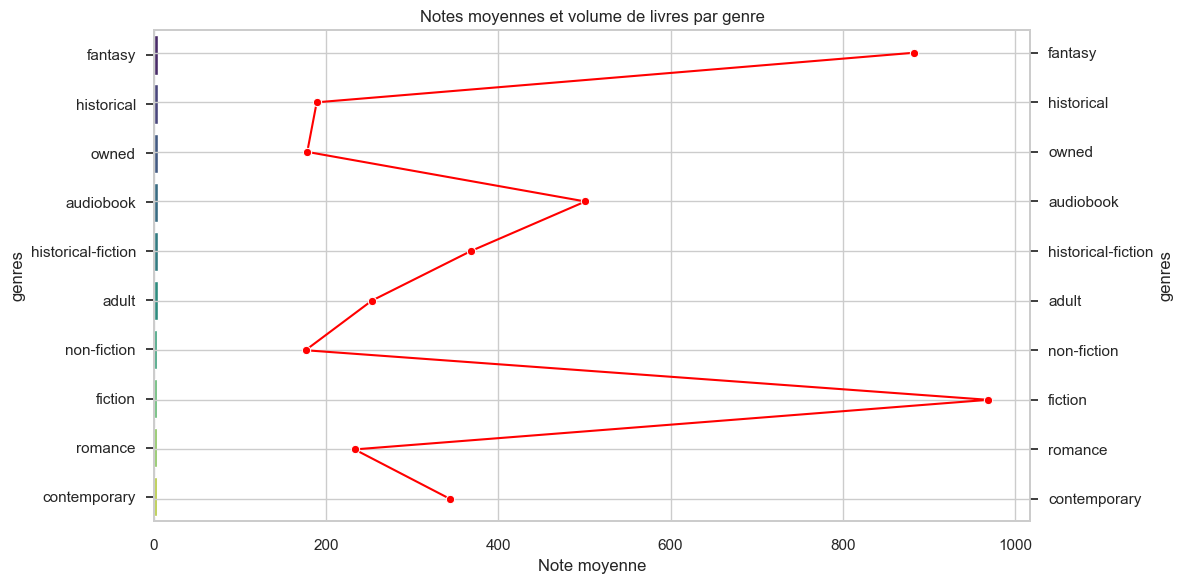

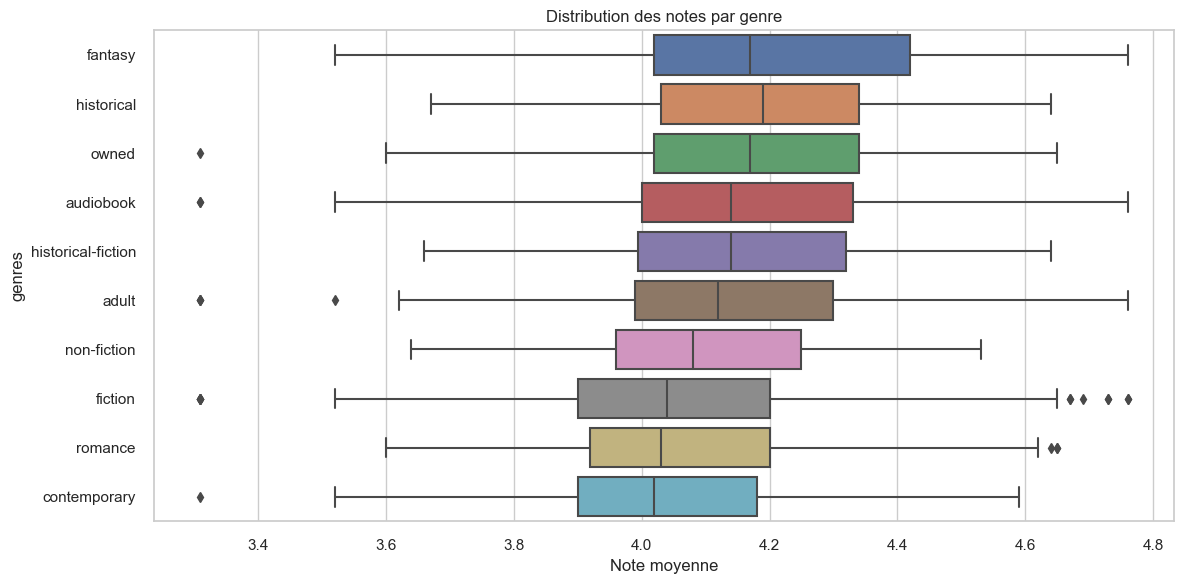

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Vérification et préparation des données
print("Colonnes disponibles :", df_csv.columns.tolist())  # Vérifiez le nom exact des colonnes

# Correction du nom de colonne si nécessaire (exemple)
df_csv = df_csv.rename(columns={'Genres': 'genres'})  # Adaptez selon votre vrai nom de colonne

# 2. Préparation des données top genres
top_genres = ['fiction', 'fantasy', 'audiobook', 'historical-fiction', 
             'contemporary', 'adult', 'romance', 'historical', 'owned', 'non-fiction']

# Conversion en minuscules et explosion
df_exploded = df_csv.copy()
df_exploded['genres'] = df_exploded['genres'].apply(lambda x: [g.lower().strip() for g in x])
df_exploded = df_exploded.explode('genres')

# Filtrage des top genres
df_filtered = df_exploded[df_exploded['genres'].isin(top_genres)]

# 3. Visualisation 1: Barplot des notes moyennes
plt.figure(figsize=(12, 6))
sns.barplot(data=df_filtered, 
            x='Note moyenne', 
            y='genres',
            estimator='mean',
            errorbar=None,
            order=df_filtered.groupby('genres')['Note moyenne'].mean().sort_values(ascending=False).index)
plt.title('Notes moyennes par genre')
plt.tight_layout()
plt.show()

# 4. Visualisation 2: Relation note/volume
genre_stats = df_filtered.groupby('genres').agg(
    note_moyenne=('Note moyenne', 'mean'),
    nb_livres=('Titre', 'count')
).sort_values('note_moyenne', ascending=False)

fig, ax1 = plt.subplots(figsize=(12, 6))
sns.barplot(data=genre_stats.reset_index(), 
            x='note_moyenne', 
            y='genres',
            ax=ax1,
            palette='viridis')
ax1.set_xlabel('Note moyenne')

ax2 = ax1.twinx()
sns.lineplot(data=genre_stats.reset_index(),
             x='nb_livres',
             y='genres',
             ax=ax2,
             color='red',
             marker='o',
             sort=False)
ax2.set_xlabel('Nombre de livres', color='red')
plt.title('Notes moyennes et volume de livres par genre')
plt.tight_layout()
plt.show()

# 5. Boxplot version corrigée
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered,
            y='genres',
            x='Note moyenne',
            order=genre_stats.sort_values('note_moyenne', ascending=False).index)
plt.title('Distribution des notes par genre')
plt.tight_layout()
plt.show()